# Messages throughput

In this notebook, we do an analysis of the average amount of messages we get to send compressed per second for a worst case scenario of a payload with a high entropy composed of random numbers.

These tests have been run on the commit 79551eaa from branch compression.

For this we ran as a publisher:
```
 ./target/release/examples/z_pub_thr 8 -m peer -c test.json5 --high-entropy --no-multicast-scouting -e tcp/127.0.0.1:7447
```
and as a receiver
```
./target/release/examples/z_sub_thr -m peer --no-multicast-scouting -l tcp/127.0.0.1:7447 -n 10000 -s 1000
```

varying the size of the messages size from 8 bytes to 56KB. For 64KB message size an error occurs that is yet to be determined what happened (something related to the orchestrator).

A python script was used to generate all the output results, which can be found on this repo under script.py:

In [63]:
cat ../script.py

import subprocess
import os

KB = 1024

SIZES = [8, 16, 32, 64, 128, 256, 512, KB, 2*KB, 4*KB, 8*KB, 16*KB, 24*KB, 32*KB, 40*KB, 48*KB, 56*KB, 63*KB]

def run_compression(compression_enabled, with_high_entropy = False):
    rcv_cmds = ["../zenoh/target/release/examples/z_sub_thr", "-m", "peer", "--no-multicast-scouting", "-l", "tcp/127.0.0.1:7447", "-n", "10000", "-s", "1000"]
    if compression_enabled:
        rcv_cmds.insert(3, "-c")
        rcv_cmds.insert(4, "compression_enabled.json5")
    for size in SIZES:
        send_cmds = ["../zenoh/target/release/examples/z_pub_thr", str(size), "-m", "peer", "--no-multicast-scouting", "-e", "tcp/127.0.0.1:7447"]
        if compression_enabled:
            send_cmds.insert(4, "-c")
            send_cmds.insert(5, "compression_enabled.json5")
            
            if (with_high_entropy):
                send_cmds.insert(6, "--high-entropy")
        

        path = "output_64"
        if compression_enabled:
            path += "/compress

Where in test.json5 we enable the compression.

In [64]:
import pandas as pd
import matplotlib.pyplot as plt


In [65]:
KB = 1024
SIZES = [8, 16, 32, 64, 128, 256, 512, KB, 2*KB, 4*KB, 8*KB, 16*KB, 24*KB, 32*KB, 40*KB, 48*KB, 56*KB, 63*KB]

In [66]:
def parse_file(filename):
    file = open(filename, 'r')
    lines = file.readlines()
    measurements = []
    for line in lines:
        measurement = line.strip(' msg/s\n')
        measurements = measurements + [float(measurement)]
    return measurements
        

In [67]:
def parse_batch_size_file(filename):
    file = open(filename, 'r')
    lines = file.readlines()
    measurements = []
    count = 0
    for line in lines:
        measurement = line.strip(' bytes\n')
        measurements = measurements + [int(measurement)]
        count = count + 1
        if count > 500:
            break
    return measurements
        

In [68]:
import numpy as np

In [69]:
averages_low_entropy = {}
averages_high_entropy = {}
averages_uncompressed = {}
for size in SIZES:
    averages_uncompressed[size] = np.average(parse_file('../output/compression_disabled/compression_logs/compression_' + str(size) + '.txt'))
    averages_low_entropy[size] = np.average(parse_file('../output/compression_enabled/low_entropy/compression_logs/compression_' + str(size) + '.txt'))
    averages_high_entropy[size] = np.average(parse_file('../output/compression_enabled/high_entropy/compression_logs/compression_' + str(size) + '.txt'))

print(averages_uncompressed)
print(averages_low_entropy)
print(averages_high_entropy)

{8: 5438335.863288455, 16: 5317652.1761067705, 32: 5464540.411061123, 64: 5304919.970245249, 128: 4959176.356897409, 256: 4525223.472832913, 512: 3960372.12476685, 1024: 3521425.9421416754, 2048: 2676916.322966819, 4096: 1694640.2844267774, 8192: 739162.8879037175, 16384: 334756.09019610565, 24576: 222848.815694133, 32768: 134639.46600928376, 40960: 126491.38181426124, 49152: 112194.19992564083, 57344: 107473.44673395553, 64512: 102049.56880744078}
{8: 5125759.080527643, 16: 5253247.981499054, 32: 5283645.731790324, 64: 5276475.12603676, 128: 5120217.26768663, 256: 4751056.8090550415, 512: 4102484.076824672, 1024: 3393521.784595026, 2048: 2427751.7374090576, 4096: 1647437.7272565807, 8192: 746097.1262787179, 16384: 279351.12522059993, 24576: 155265.98603005885, 32768: 66276.58420709702, 40960: 59837.54175863274, 49152: 51456.5634481155, 57344: 44991.31929304945, 64512: 42210.60368210061}
{8: 5027605.244532706, 16: 5174660.093507143, 32: 5227608.275666102, 64: 5204532.623830602, 128: 51

In [70]:
batch_sizes_low_entropy = {}
batch_sizes_high_entropy = {}
for size in SIZES:
    batch_sizes_low_entropy[size] = np.average(parse_batch_size_file('../output/compression_enabled/low_entropy/batch_sizes/batch_size_' + str(size) + '.txt'))
    batch_sizes_high_entropy[size] = np.average(parse_batch_size_file('../output/compression_enabled/high_entropy/batch_sizes/batch_size_' + str(size) + '.txt'))

print(batch_sizes_high_entropy)
print(batch_sizes_low_entropy)

{8: 239.50898203592814, 16: 244.6986027944112, 32: 246.0758483033932, 64: 285.3552894211577, 128: 386.20958083832335, 256: 518.0239520958083, 512: 779.249500998004, 1024: 1299.8223552894212, 2048: 2305.880239520958, 4096: 4353.309381237525, 8192: 8423.56886227545, 16384: 16571.52894211577, 24576: 24747.17764471058, 32768: 32719.233532934133, 40960: 40894.882235528945, 49152: 49070.53093812375, 57344: 57246.17964071856, 64512: 64399.87225548902}
{8: 255.5888223552894, 16: 241.5568862275449, 32: 263.72654690618765, 64: 267.11976047904193, 128: 228.44111776447104, 256: 282.42914171656685, 512: 284.63473053892216, 1024: 292.5988023952096, 2048: 288.6047904191617, 4096: 280.88423153692617, 8192: 265.14171656686625, 16384: 234.20359281437126, 24576: 233.40518962075848, 32768: 166.33932135728543, 40960: 198.2754491017964, 49152: 230.2115768463074, 57344: 262.14770459081836, 64512: 290.0918163672655}


In [71]:
df_low_entropy = pd.DataFrame(averages_low_entropy.items())
df_high_entropy = pd.DataFrame(averages_high_entropy.items())
df_uncompressed = pd.DataFrame(averages_uncompressed.items())

In [72]:
df_batch_size_low_entropy = pd.DataFrame(batch_sizes_low_entropy.items())
df_batch_size_high_entropy = pd.DataFrame(batch_sizes_high_entropy.items())

In [73]:
df_low_entropy

,0,1
0,8,5.125759e+06
1,16,5.253248e+06
2,32,5.283646e+06
3,64,5.276475e+06
4,128,5.120217e+06
5,256,4.751057e+06
6,512,4.102484e+06
7,1024,3.393522e+06
8,2048,2.427752e+06
9,4096,1.647438e+06


In [74]:
df_high_entropy

,0,1
0,8,5.027605e+06
1,16,5.174660e+06
2,32,5.227608e+06
3,64,5.204533e+06
4,128,5.150043e+06
5,256,4.755085e+06
6,512,3.929211e+06
7,1024,3.250259e+06
8,2048,2.143248e+06
9,4096,1.235177e+06


In [75]:
df_uncompressed

,0,1
0,8,5.438336e+06
1,16,5.317652e+06
2,32,5.464540e+06
3,64,5.304920e+06
4,128,4.959176e+06
5,256,4.525223e+06
6,512,3.960372e+06
7,1024,3.521426e+06
8,2048,2.676916e+06
9,4096,1.694640e+06


In [76]:
def plot_messages_per_second():
    fig, ax = plt.subplots()

    ax.plot(df_low_entropy[0], df_low_entropy[1], label="Low entropy", marker='o')
    ax.plot(df_high_entropy[0], df_high_entropy[1], label="High entropy", marker='o')
    ax.plot(df_uncompressed[0], df_uncompressed[1], label="Uncompressed", marker='o')

    ax.set_xticks(df_low_entropy[0])
    ax.set_ylabel('Msgs/s')
    ax.set_xlabel('Message size')
    ax.set_xscale('log')
    ax.set_title('Average messages per second depending on the size of the message with compression with a low entropy payload')
    ax.grid(True)
    ax.legend(loc='center right', ncols=1)
    fig.set_figwidth(15)
    plt.show()


In [77]:
def plot_batch_sizes():
    fig, ax = plt.subplots()

    ax.plot(df_batch_size_low_entropy[0], df_batch_size_low_entropy[1], label="Low entropy", marker='o')
    ax.plot(df_batch_size_high_entropy[0], df_batch_size_high_entropy[1], label="High entropy", marker='o')

    ax.set_xticks(df_low_entropy[0])
    ax.set_ylabel('Msgs/s')
    ax.set_xlabel('Message size')
    ax.set_xscale('log')
    ax.set_title('Batch sizes')
    ax.grid(True)
    ax.legend(loc='center right', ncols=1)
    fig.set_figwidth(15)
    plt.show()


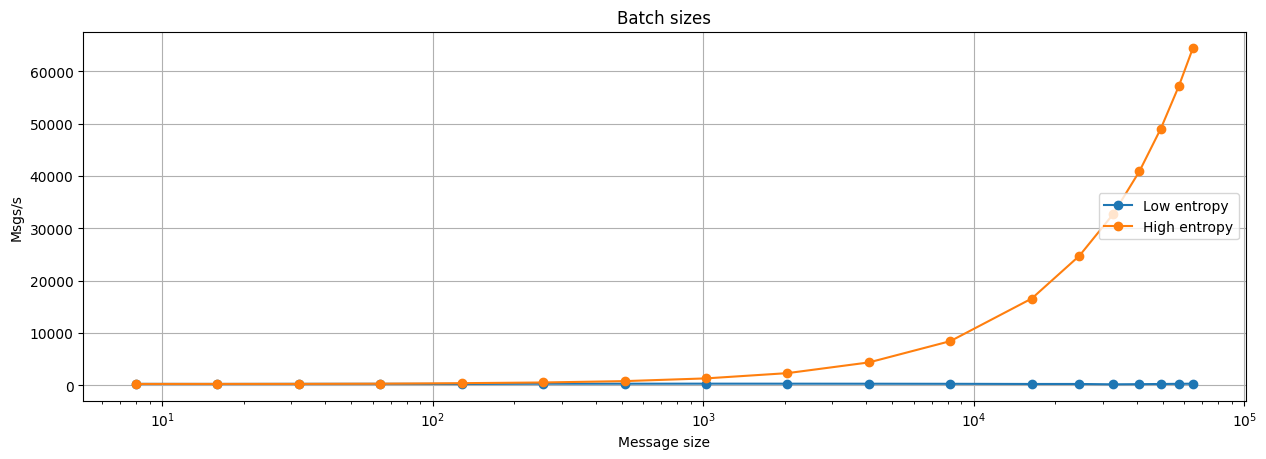

In [78]:
plot_batch_sizes()

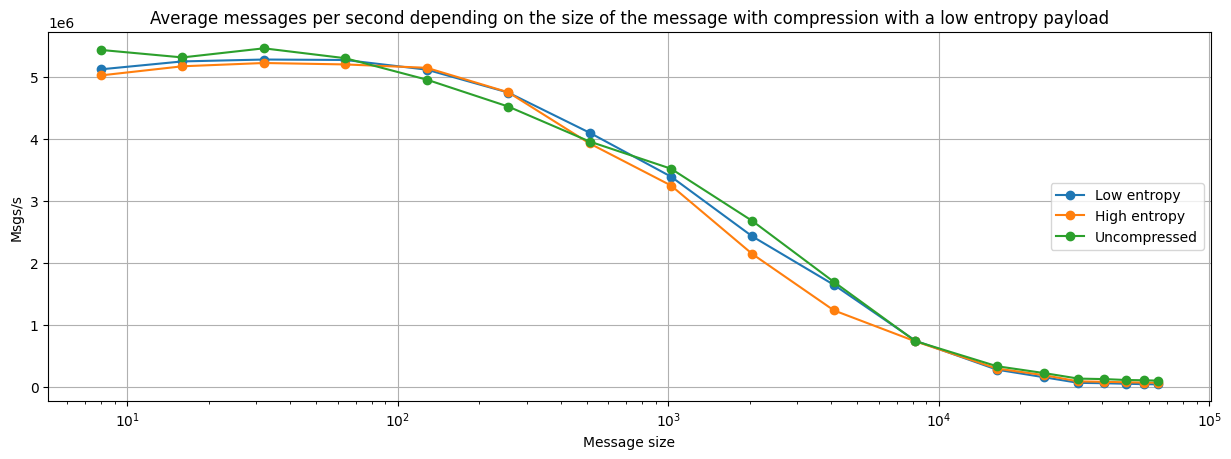

In [79]:
plot_messages_per_second()